In [1]:
#改良型ニューラルネット実モデル
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from scipy.stats import chi2_contingency

2025-11-01 12:37:01.852915: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-01 12:37:01.920816: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-01 12:37:04.083306: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
#データの読み込み
data = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)

In [3]:
#説明変数10個でニューラルネットを作成
x_train_10 = x_train[:, :10]
x_test_10 = x_test[:, :10]
print(x_train_10.shape)
print(x_test_10.shape)

(398, 10)
(171, 10)


In [4]:
#ニューラルネット実装
model = Sequential()
model.add(Dense(4, input_shape=(10,), activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-01 12:37:04.461564: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
result = model.fit(x_train_10, y_train, epochs=300, batch_size=32)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6332 - loss: 75.0818  
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6332 - loss: 59.5676 
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 42.0953 
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 21.8465 
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7362 - loss: 5.1581  
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8266 - loss: 1.0293 
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8166 - loss: 1.1718 
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8442 - loss: 0.8667 
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8643 - loss: 0.8806 
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8568 - loss: 0.8594 
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8467 - loss: 0.8575 
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

Text(0, 0.5, '正解率')

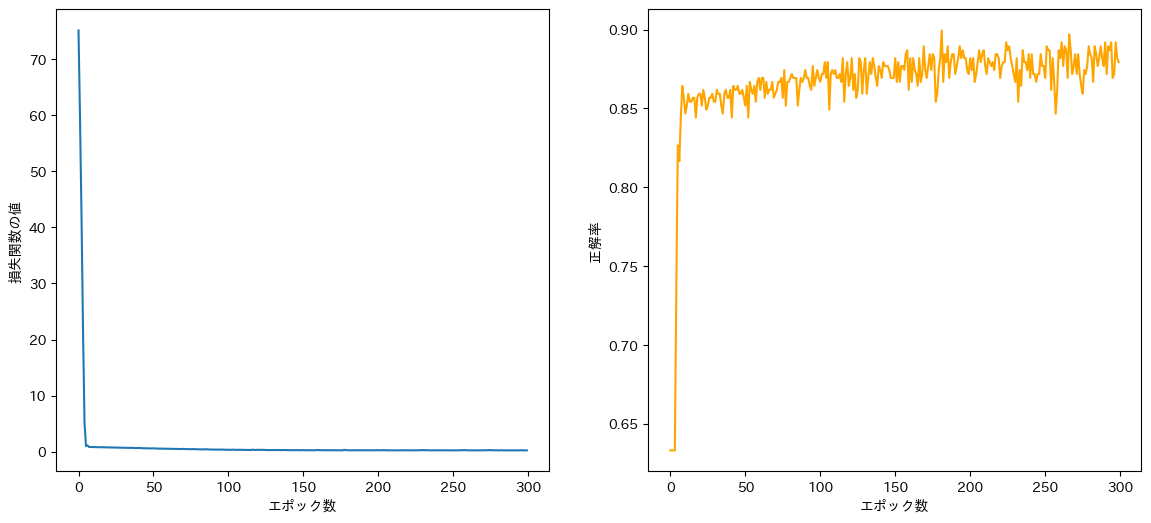

In [6]:
# figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(14,6))

# add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.plot(result.history['loss'], label='損失関数')
ax1.set_xlabel('エポック数')
ax1.set_ylabel('損失関数の値')

ax2.plot(result.history['accuracy'], label='正解率',c='orange')
ax2.set_xlabel('エポック数')
ax2.set_ylabel('正解率')

In [7]:
eval_loss, eval_acc = model.evaluate(x_test_10, y_test, verbose=0)
print(f'評価用データでの損失関数の値: {eval_loss}')
print(f'評価用データでの正解率: {eval_acc}')    

評価用データでの損失関数の値: 0.33812183141708374
評価用データでの正解率: 0.8654970526695251


In [8]:
prediction=model.predict(x_test_10)
predicted_classes = (prediction > 0.5).astype(int).flatten()

print("予測値:", predicted_classes)
print("正解値:", y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
予測値: [1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0]
正解値: [0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0
 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0]


In [9]:
test_df = pd.DataFrame({'予測値':predicted_classes,'正解値':y_test})
cross_df=pd.crosstab(index=test_df['正解値'], columns=test_df['予測値'], rownames=['実際'], colnames=['予測']) 
cross_df=cross_df.reindex(columns=[1, 0], index=[1, 0])
cross_df

予測,1,0
実際,,
1,103,2
0,21,45


In [10]:
# 作成したクロス集計表を関数に渡す
chi2, p, dof, expected = chi2_contingency(cross_df)
print("カイ二乗値:", chi2)
print("p値:", p)
print("自由度:", dof)
print("期待度数:\n", expected)

カイ二乗値: 86.02304342448903
p値: 1.778510688169632e-20
自由度: 1
期待度数:
 [[76.14035088 28.85964912]
 [47.85964912 18.14035088]]
